# Surface tension diagram of a pure substance

In [1]:
import feos
import si_units as si
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_context('talk')
sns.set_palette('Dark2')
sns.set_style('ticks')
colors = sns.palettes.color_palette('Dark2', 1)

In [2]:
parameters = feos.Parameters.from_json(
    substances=['methanol'], 
    pure_path='../../parameters/pcsaft/gross2002.json'
)
functional = feos.HelmholtzEnergyFunctional.pcsaft(parameters)

In [3]:
phase_diagram = feos.PhaseDiagram.pure(functional, 150 * si.KELVIN, 25)

In [4]:
st_diagram = feos.SurfaceTensionDiagram(
    phase_diagram.states,
    n_grid=1024
)

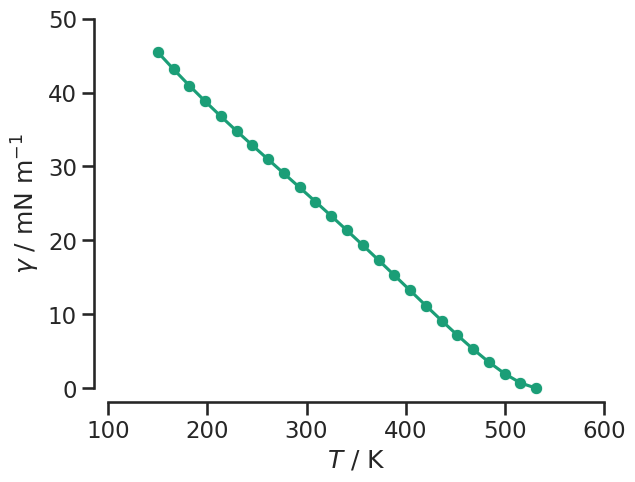

In [5]:
sns.lineplot(
    y=st_diagram.surface_tension / (si.MILLI * si.NEWTON / si.METER),
    x=st_diagram.liquid.temperature / si.KELVIN
)
sns.scatterplot(
    y=st_diagram.surface_tension / (si.MILLI * si.NEWTON / si.METER),
    x=st_diagram.liquid.temperature / si.KELVIN,
    clip_on=False
)
sns.despine(offset=10)
plt.xlim(100, 600)
plt.ylim(0, 50)
plt.xlabel(r'$T$ / K')
plt.ylabel(r'$\gamma$ / mN m$^{-1}$');